# Easy Visa

### Importing Libraries

In [2]:
import warnings

warnings.filterwarnings('ignore')

# data manipulation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modeling libraries
from sklearn.model_selection import train_test_split, GridSearchCV

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve, \
    auc, precision_recall_curve, recall_score, precision_score

### Importing Data

In [8]:
# original data
visa = pd.read_csv('EasyVisa.csv')

# copying the data to avoid any changes in the original data
data = visa.copy()

### Data Information

In [23]:
data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [24]:
data.info()
# data is full and there is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [25]:
print('There is {} rows, and {} columns in the data'.format(data.shape[0], data.shape[1]))

There is 25480 rows, and 12 columns in the data


In [26]:
print('The columns are:')
data.columns

The columns are:


Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [27]:
print('There are {} duplicated rows in the data.'.format(data.duplicated().sum()))

There are 0 duplicated rows in the data.


### Data Exploration

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


**Observations:**
* The range of the number of employees in a company is huge. There are some anomalies in the data as we can see that the minimum number of employees is equal to -26, which is not possible. We will have to fix this.
* The year of establishment of companies ranges from 1800 to 2016, which seems fine.
* The average prevailing wage is 74455.81. There's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in this column.

### Fixing the negative values in the number of employees column

In [32]:
data.loc[data.no_of_employees < 0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,EZYV379,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,EZYV833,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,EZYV2919,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,EZYV6440,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,EZYV7225,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,EZYV7282,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,EZYV7762,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


In [33]:
data.loc[data.no_of_employees < 0, 'no_of_employees'] = abs(data.loc[data.no_of_employees < 0, 'no_of_employees'])

In [36]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


### Let's check the count of each unique category in each of the categorical columns

In [42]:
cat_col = data.select_dtypes(include='object').columns

for i in cat_col:
    print('----------------------DIVIDED-------------------------')
    print('The count of each unique category in {} column is:'.format(i))
    print(data[i].value_counts())


----------------------DIVIDED-------------------------
The count of each unique category in case_id column is:
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: case_id, Length: 25480, dtype: int64
----------------------DIVIDED-------------------------
The count of each unique category in continent column is:
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
----------------------DIVIDED-------------------------
The count of each unique category in education_of_employee column is:
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
----------------------DIVIDED-------------------------
The count of each unique category in has_job_experience column is:
Y    14802
N    10678
Name:

**Observations:**
* Most of the applications in data are from Asians followed by Europeans.
* Most of the applicants have a bachelor's degree followed by a master's degree.
* Most of the applicants have job experience and do not require job training.
* Most applicants have their worksite in the Northeast region of the US.
* Most applicants will yearly unit of wage.
* Most of the visa applications are for full-time job positions.
* The target column case status is imbalanced with many applicants having a certified visa.

In [44]:
# check the number of unique values in case id
data.case_id.nunique()

25480

* All the values in the case id column are unique.
* We can drop this column.

In [45]:
data.drop('case_id', axis=1, inplace=True)

In [46]:
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### Univariate Analysis

In [47]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=50):
    """ 
    Boxplot and histogram combined
    
    data : dataframe
    feature : dataframe column
    figsize : size of figure
    ked : kdeplot boolean
    bins : number of bins
    """

    figs, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # Share x-axis
        figsize=figsize,
        dpi=100,
        gridspec_kw={"height_ratios": (0.25, 0.75)}  # Heights of the axes proportions
    )

    sns.boxplot(
        data=data,
        width=0.4,
        x=feature,
        ax=ax_box,
        showmeans=True,  # Show the arithmetic mean,
        color='red'
    )

    sns.histplot(
        data=data,
        x=feature,
        ax=ax_hist,
        kde=kde,  # kde plot
        bins=bins
    )

    # Add a line for the mean.
    ax_hist.axvline(
        data[feature].mean(),
        color='green',
        linestyle='--'
    )

    # Add a line for the median.
    ax_hist.axvline(
        data[feature].median(),
        color='black',
        linestyle='-'
    )

#### observations on number of employees

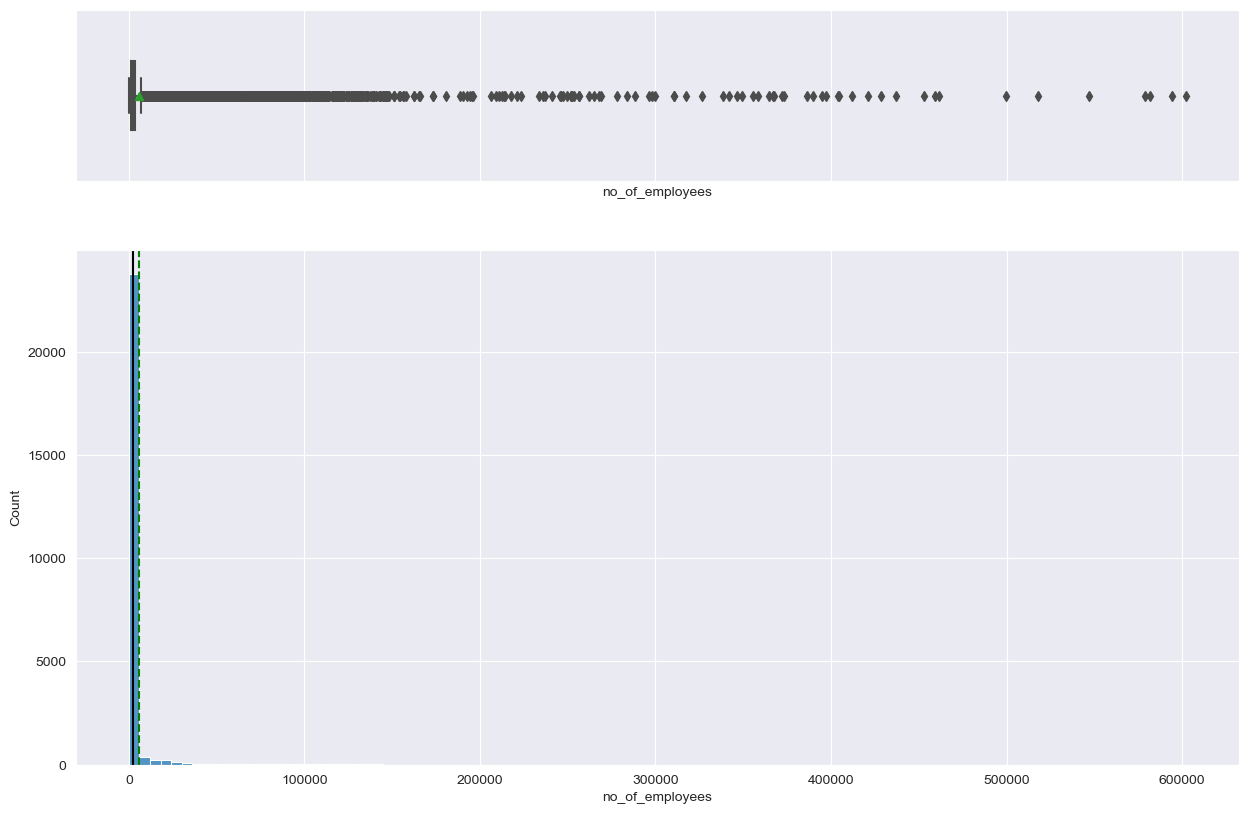

In [60]:
histogram_boxplot(data, 'no_of_employees', bins=100)

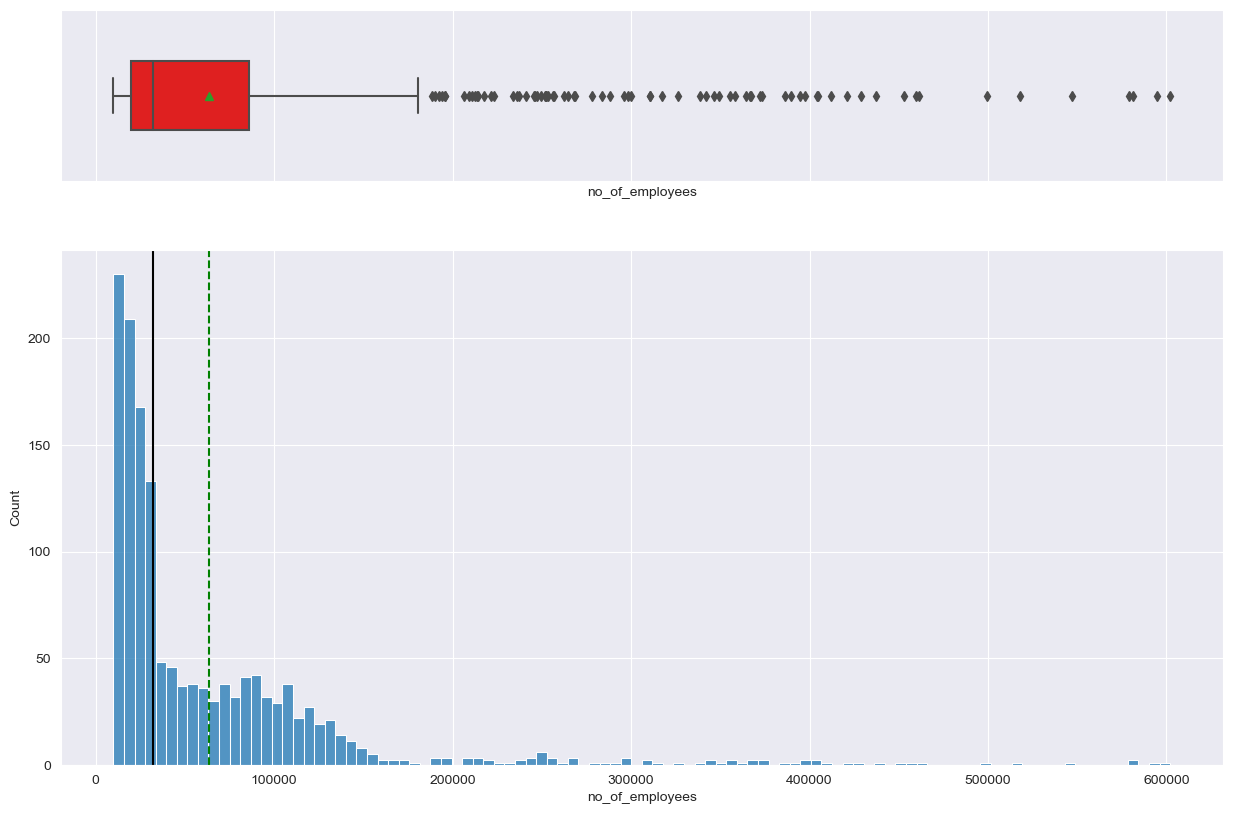

In [63]:
# check the number of employees greater than 10000

data_emp_without_zero = data.loc[data['no_of_employees'] > 10000]

histogram_boxplot(data_emp_without_zero, 'no_of_employees', bins=100)

* The distribution of the number of employees is heavily right-skewed.
* Some companies have more than 500k employees. Such companies might have multiple offices around the world./

#### observations on prevailing wage

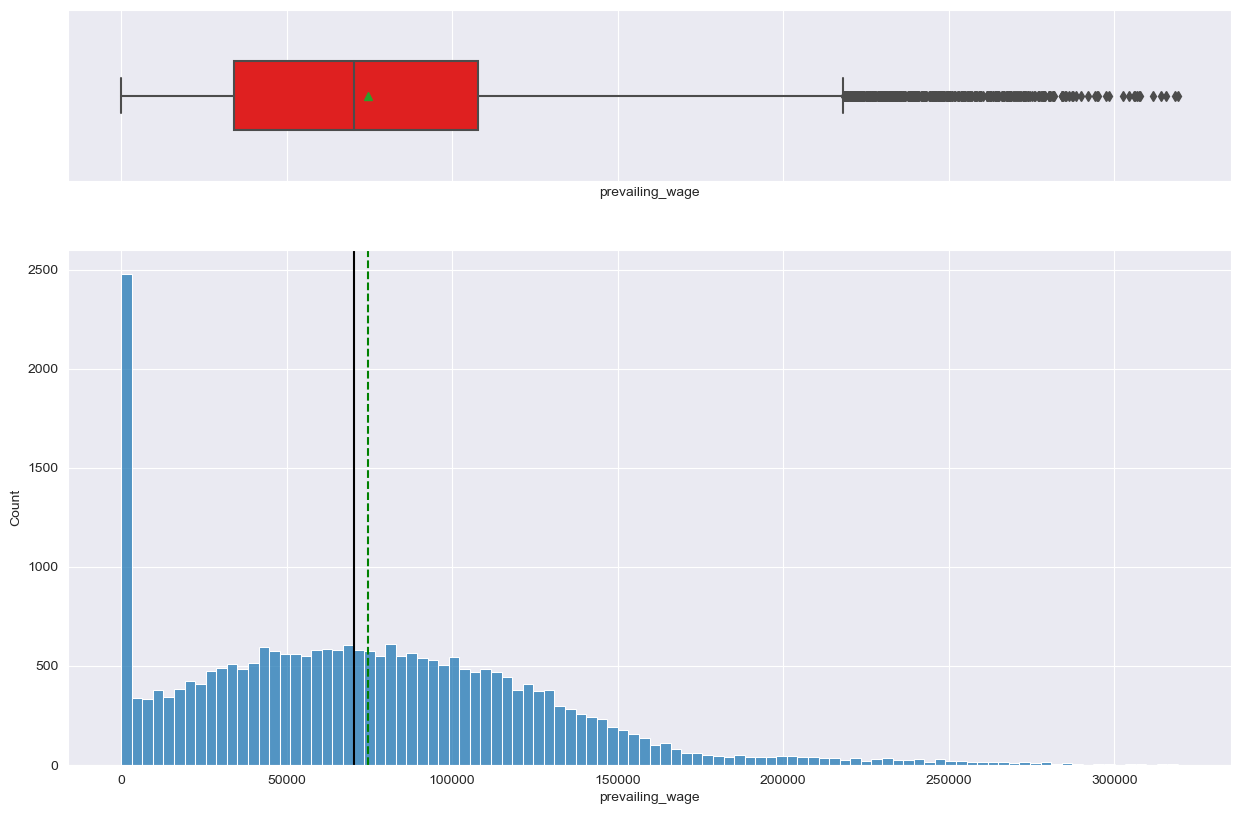

In [64]:
histogram_boxplot(data, 'prevailing_wage', bins=100)

* The distribution of prevailing wage is skewed to the right.
* There are some job roles where the prevailing wage is more than 200k.
* The distribution suggests that some applicants have prevailing wage around 0, let's have a look at them. As we say in the data summary the minimum value is 2.13.

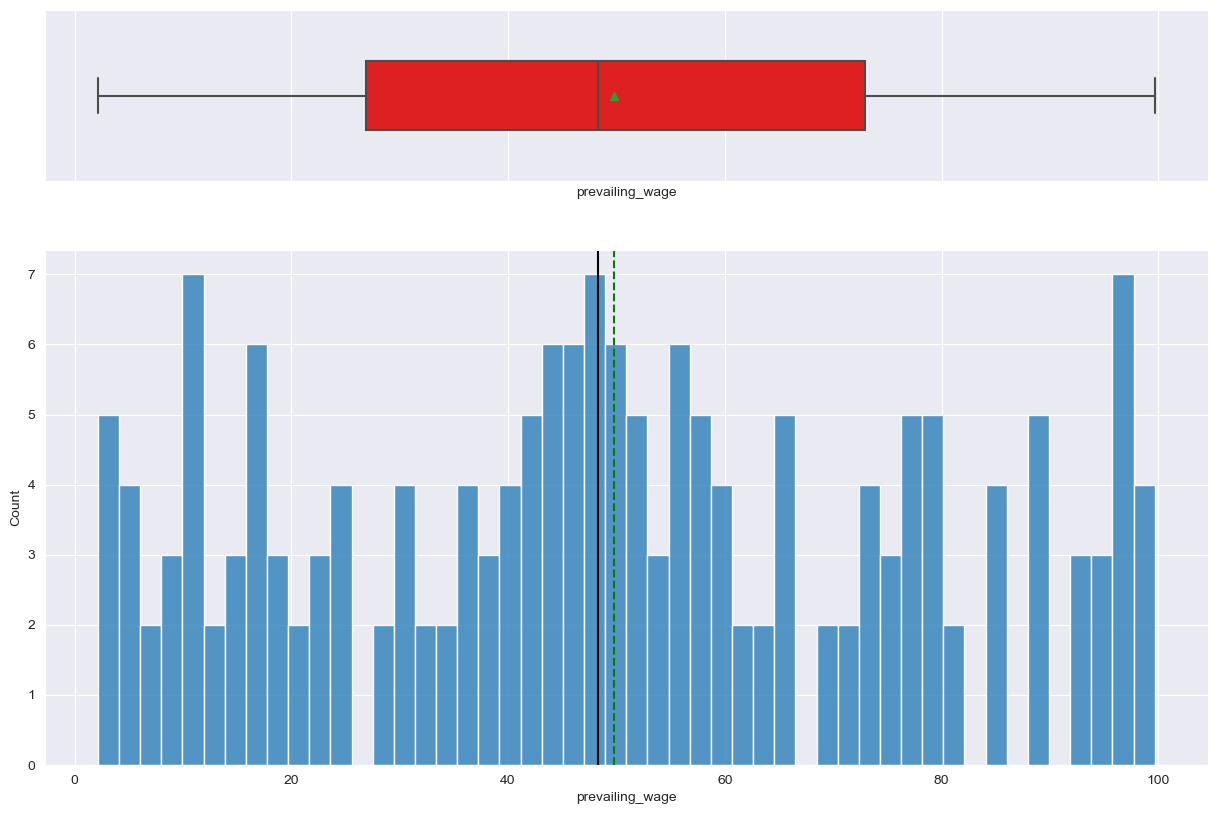

In [68]:
# checking the applicants with prevailing wage less than 100
data.loc[data['prevailing_wage'] < 100]

histogram_boxplot(data.loc[data['prevailing_wage'] < 100], 'prevailing_wage')

* It looks like the unit of the wage for these observations is hours. 

In [69]:
data.loc[data['prevailing_wage'] < 100, 'unit_of_wage'].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

* All such observations where the prevailing wage is less than 100 have the unit of wage as hours. This makes sense and confirms that these are not anomalous observations in the data.

In [70]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    
    data : dataframe
    feature : dataframe column
    perc : True for percentage, False for count
    n : how many categories to show
    """

    total = len(data[feature])
    count = data[feature].nunique()

    if n is None:
        plt.figure(figsize=(count + 2, 6), dpi=100)
    else:
        plt.figure(figsize=(n + 2, 6), dpi=100)

    ax = sns.countplot(data=data, x=feature,
                       palette='Paired',
                       order=data[feature].value_counts().index[:n]
                       )

    for p in ax.patches:
        if perc == True:
            lable = f"{p.get_height() / total * 100:.2f}%\n"
        else:
            lable = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(lable, (x, y), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.xlabel(feature, fontsize=14, weight='bold')
    plt.ylabel('Count', fontsize=14, weight='bold')

    plt.show()

#### observations on continent of citizenship

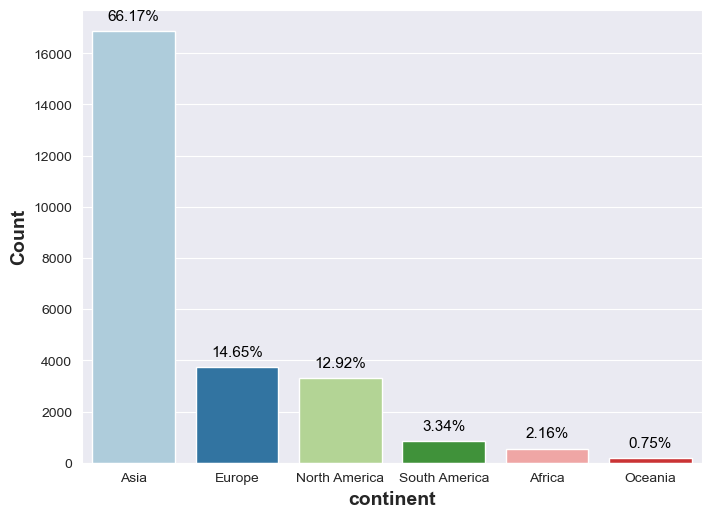

In [74]:
labeled_barplot(data, 'continent', perc=True)

* Most of the applicants are from Asia followed by Europe.
* More than 90% of the applicants are from Asia, Europe, and North America.

#### observations on education

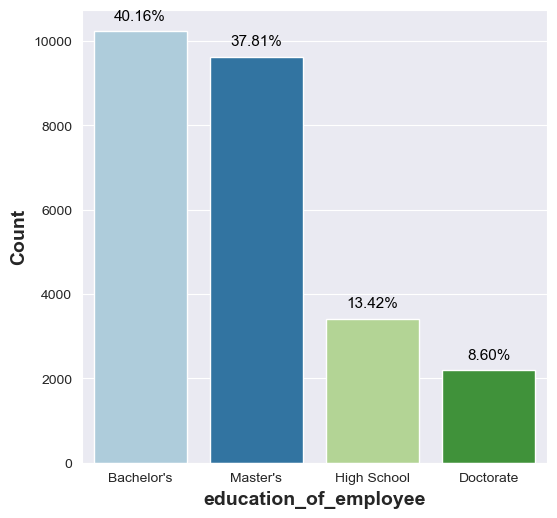

In [77]:
labeled_barplot(data, 'education_of_employee', perc=True)

* 40.2% of the applicants have a bachelor's degree, followed by 37.8% having a master's degree.
* 8.6% of the applicants have a doctorate degree.

#### observations on job experience

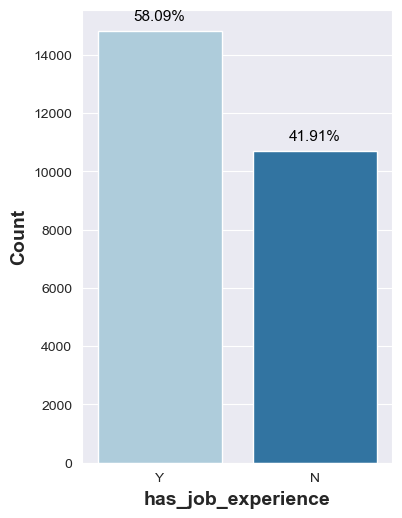

In [79]:
labeled_barplot(data, 'has_job_experience', perc=True)

* 58% of the applicants have job experience.

#### observations on job training

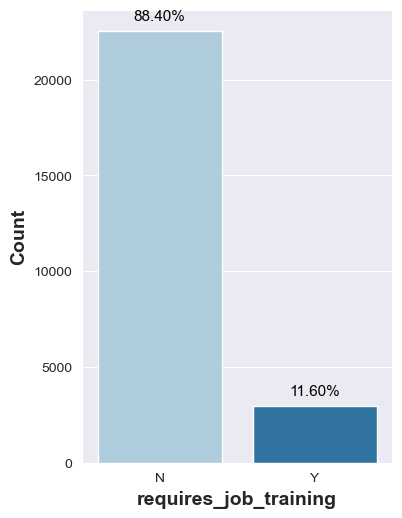

In [80]:
labeled_barplot(data, 'requires_job_training', perc=True)

* 88% of the applicants do not require job training.

#### observations on region of employment

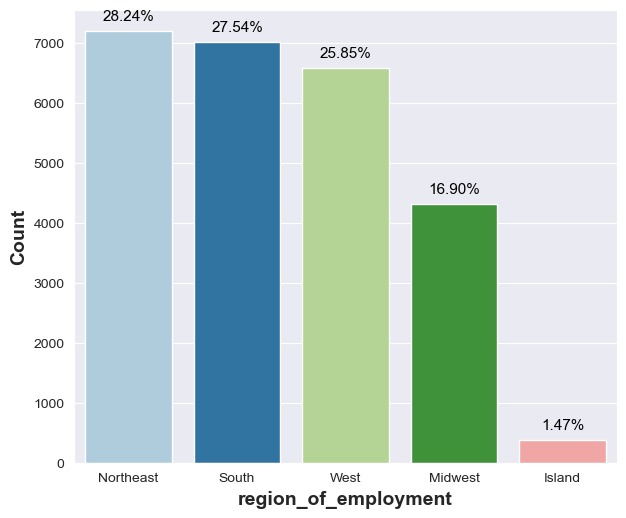

In [81]:
labeled_barplot(data, 'region_of_employment', perc=True)

* 28.2% of the applicants have their worksite in the Northeast region of the US.
* 27.5% of the applicants have their worksite in the South region of the US.
* 25.8% of the applicants have their worksite in the West region of the US.
* Least number of applicants have their worksite in the Island.

#### observations on unit of wage

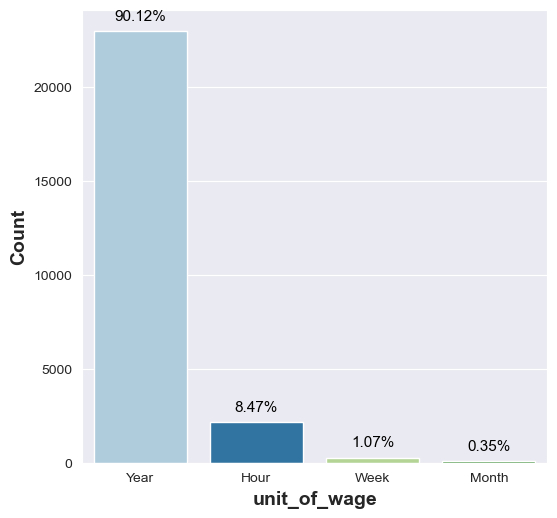

In [82]:
labeled_barplot(data, 'unit_of_wage', perc=True)

* 90.1% of the applicants have a yearly unit of the wage, followed by 8.5% of the applicants having hourly wages.

#### observations on case status

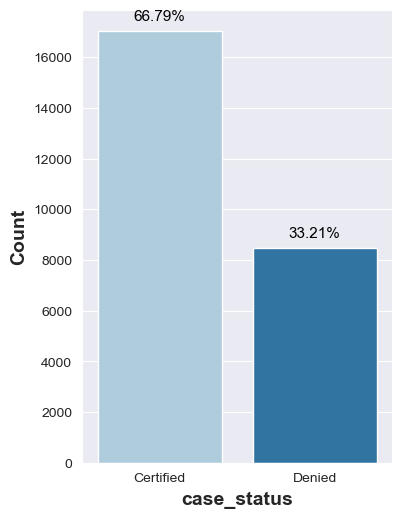

In [83]:
labeled_barplot(data, 'case_status', perc=True)

* 66.8% of the visas were certified.

### Bivariate Analysis

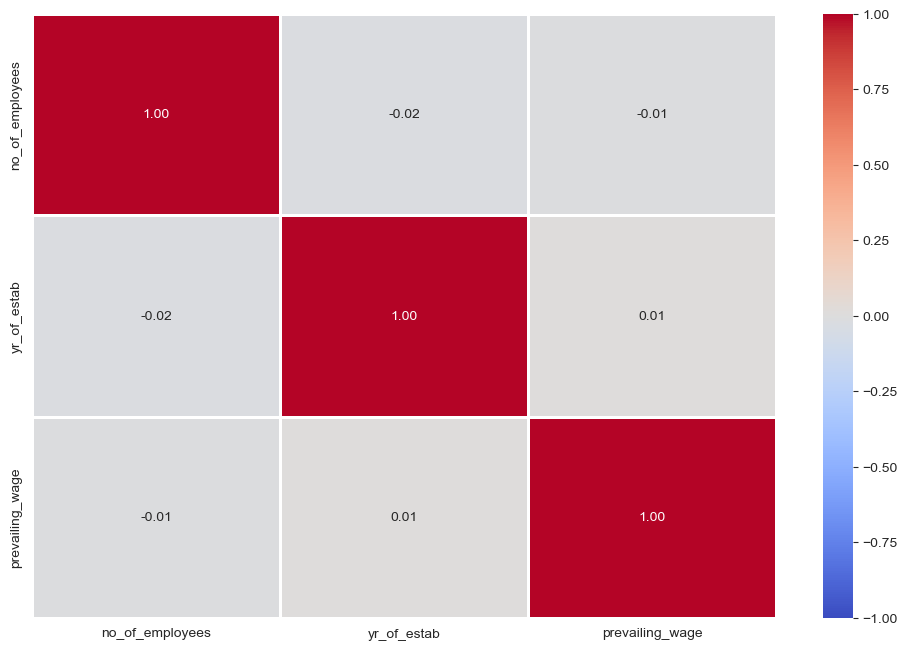

In [94]:
cols_list = data.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 8), dpi=100)

sns.heatmap(
    data[cols_list].corr(),
    annot=True,
    fmt='.2f',
    linewidths=2,
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)

plt.show()

* There's no correlation within the independent features of the data.

#### create functions for plotting categorical variables with respect to the target variable

In [99]:
### function to plot distributions wrt target variable

def distribution_plot_wrt_traget(data, predictor, target):
    """
    plot distribution of predictor wrt target
    
    data : dataframe
    predictor : dataframe column
    target : dataframe column
    """

    fig, axs = plt.subplots(2, 2, figsize=(15, 5), dpi=100)

    target_uniq = data[target].unique()

    axs[0, 0].set_title('Distribution of target for target=' + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color='teal',
        stat='density'
    )

    axs[0, 1].set_title('Distribution of target for target=' + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color='orange',
        stat='density'
    )

    axs[1, 0].set_title('Boxplot of target for target=' + str(target_uniq[0]))
    sns.boxplot(
        data=data,
        x=predictor,
        y=target,
        ax=axs[1, 0],
        color='teal'
    )

    axs[1, 1].set_title('Boxplot of target for target=' + str(target_uniq[1]))
    sns.boxplot(
        data=data,
        x=predictor,
        y=target,
        ax=axs[1, 1],
        color='orange'
    )

    plt.tight_layout()
    plt.show()



In [176]:
def stacked_barplot(data, predictor, target):
    """
    print the category counts and plot stacked barplot

    data : dataframe
    predictor : dataframe column
    target : dataframe column
    """

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )

    print(tab1)
    print('----------------------DIVIDED-------------------------')

    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(
        by=sorter, ascending=False
    )

    tab.plot(kind='bar', stacked=True, figsize=(count + 5, 5), xlabel=predictor, ylabel='Percentage')

    plt.legend(
        loc='upper right',
        bbox_to_anchor=(1.2, 1),
    )

    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
----------------------DIVIDED-------------------------


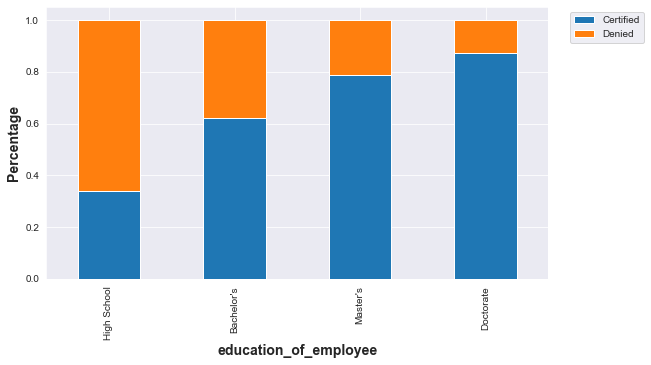

In [177]:
stacked_barplot(data, 'education_of_employee', 'case_status')

* Education seems to have a positive relationship with the certification of visa that is higher the education higher are the chances of visa getting certified.
* Around 85% of the visa applications got certified for the applicants with Doctorate degree. While 80% of the visa applications got certified for the applicants with Master's degree.
* Around 60% of the visa applications got certified for applicants with Bachelor's degrees.
* Applicants who do not have a degree and have graduated from high school are more likely to have their applications denied.

#### Different regions have different requirements of talent having diverse educational backgrounds. Let's analyze it further

In [142]:
pd.crosstab(data['education_of_employee'], data['region_of_employment'], normalize='index')

region_of_employment,Island,Midwest,Northeast,South,West
education_of_employee,,,,,
Bachelor's,0.012605,0.128493,0.280829,0.292261,0.285812
Doctorate,0.011405,0.116788,0.299270,0.246807,0.325730
High School,0.017544,0.215205,0.264620,0.273099,0.229532
Master's,0.016712,0.207598,0.286485,0.264791,0.224414


In [152]:
pd.pivot_table(
    data=data,
    index='education_of_employee',
    columns='region_of_employment',
    values='case_status',
    aggfunc='count'
)

region_of_employment,Island,Midwest,Northeast,South,West
education_of_employee,,,,,
Bachelor's,129,1315,2874,2991,2925
Doctorate,25,256,656,541,714
High School,60,736,905,934,785
Master's,161,2000,2760,2551,2162


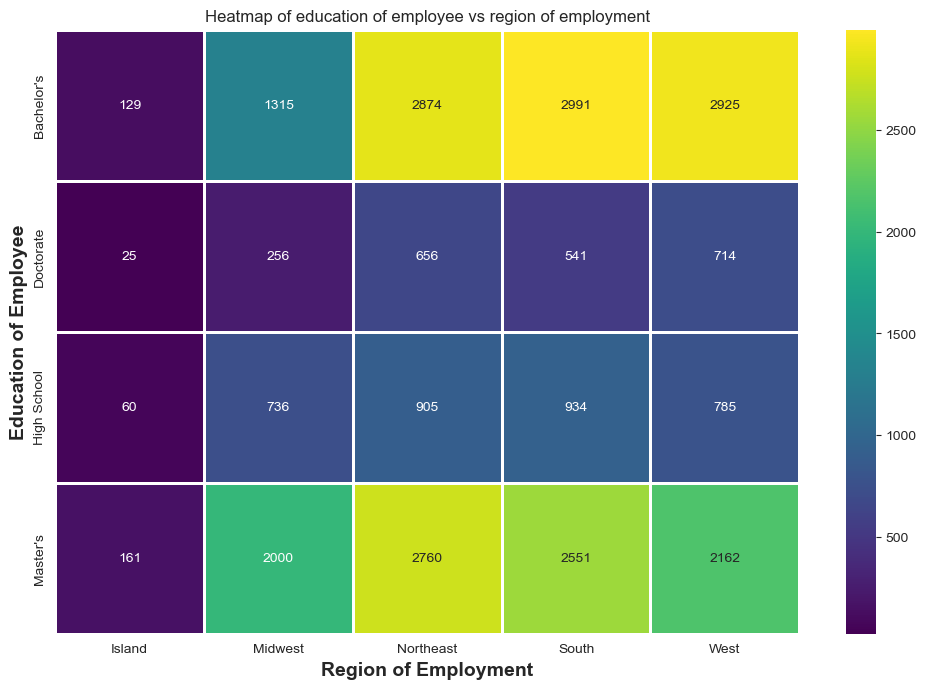

In [164]:
plt.figure(figsize=(12, 8), dpi=100)

sns.heatmap(
    pd.crosstab(data['education_of_employee'], data['region_of_employment']),
    annot=True,
    fmt='g',
    linewidths=2,
    cmap='viridis'
)

plt.xlabel('Region of Employment', fontsize=14, weight='bold')
plt.ylabel('Education of Employee', fontsize=14, weight='bold')

plt.title('Heatmap of education of employee vs region of employment')
plt.show()

* The requirement for the applicants who have passed high school is most in the South region, followed by Northeast region.
* The requirement for Bachelor's is mostly in South region, followed by West region.
* The requirement for Master's is most in Northeast region, followed by South region.
* The requirement for Doctorate's is mostly in West region, followed by Northeast region.

#### Let's have a look at the percentage of visa certifications across each region

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
----------------------DIVIDED-------------------------


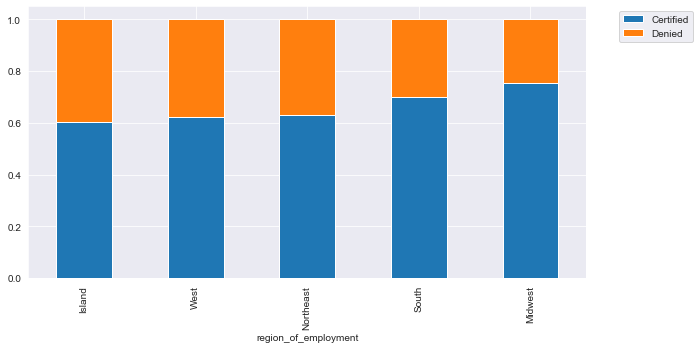

In [165]:
stacked_barplot(data, 'region_of_employment', 'case_status')